In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:

data = pd.read_csv("C:/Users/HP/OneDrive/Desktop/dataset/SVMtrain.csv")
data.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,Male,22.0,1,0,7.2500,3
1,2,1,1,female,38.0,1,0,71.2833,1
2,3,1,3,female,26.0,0,0,7.9250,3
3,4,1,1,female,35.0,1,0,53.1000,3
4,5,0,3,Male,35.0,0,0,8.0500,3


In [4]:

data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 62.6+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,35.686355,0.524184,0.382452,32.096681,2.535433
std,256.998173,0.486260,0.834700,17.756733,1.103705,0.806761,49.697504,0.792088
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,2.000000
50%,446.000000,0.000000,3.000000,32.000000,0.000000,0.000000,14.454200,3.000000
75%,668.000000,1.000000,3.000000,54.000000,1.000000,0.000000,31.000000,3.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,3.000000


In [10]:

label = LabelEncoder()
data['Sex'] = label.fit_transform(data['Sex'])


data['Embarked'] = data['Embarked'].map({'C': 1, 'Q': 2, 'S': 3})


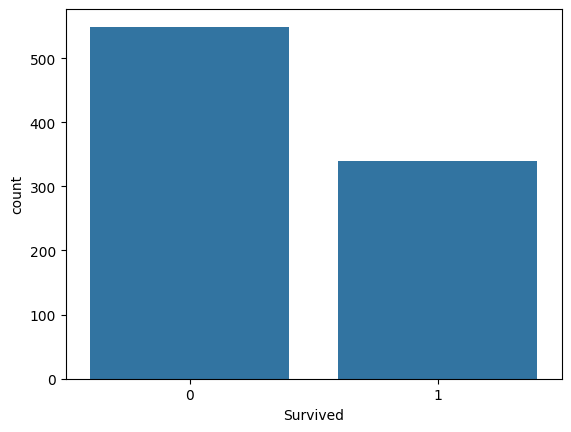

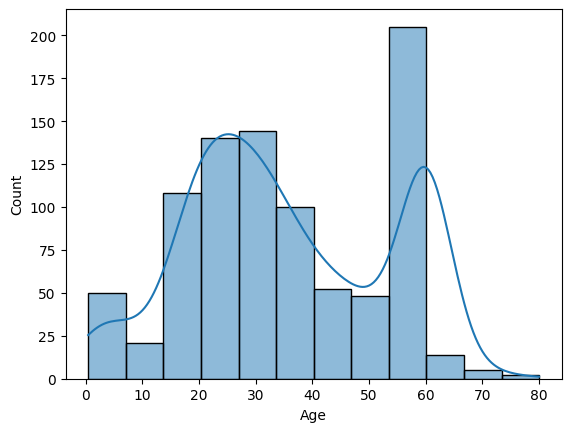

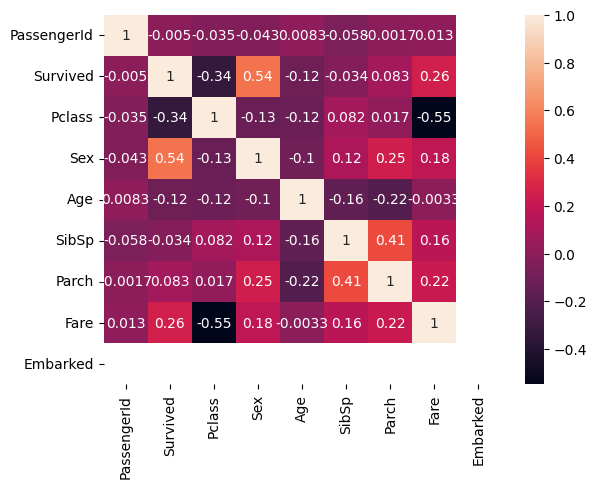

In [11]:

sns.countplot(x='Survived', data=data)
plt.show()


sns.histplot(data['Age'], kde=True)
plt.show()


sns.heatmap(data.corr(), annot=True)
plt.show()


In [12]:

X = data.drop(['PassengerId', 'Survived'], axis=1)
y = data['Survived']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [13]:
# Build RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [14]:
# Make predictions
y_pred = model.predict(X_test)

# Accuracy
print('Accuracy:', accuracy_score(y_test, y_pred))

# Confusion Matrix
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

# Classification Report
print('Classification Report:\n', classification_report(y_test, y_pred))


Accuracy: 0.797752808988764
Confusion Matrix:
 [[145  22]
 [ 32  68]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84       167
           1       0.76      0.68      0.72       100

    accuracy                           0.80       267
   macro avg       0.79      0.77      0.78       267
weighted avg       0.80      0.80      0.80       267

